# House Rocket Insights

### Importação de Bibliotecas

In [65]:
import pandas  as pd
import numpy   as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML

### Configurações Pessoais

In [66]:
def personal_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['font.size'] = 20
    display(HTML('<style>.container{width:90% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.float_format', lambda x:'%.2f' % x)
    sns.set()
    sns.set(rc = {'figure.figsize':(15,8)})

personal_settings()

Populating the interactive namespace from numpy and matplotlib


### Carregando o Dataset

In [67]:
df_raw = pd.read_csv('csv/kc_house_data.csv')

In [68]:
df = df_raw.copy()

In [69]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Dimensões

In [70]:
print(f'Número de atributos/colunas: {df.shape[1]}')
print(f'Número de registros/linhas:  {df.shape[0]}')

Número de atributos/colunas: 21
Número de registros/linhas:  21613


### Nome das Colunas

In [71]:
for i, column in enumerate(df.columns):
    print(i, column)

0 id
1 date
2 price
3 bedrooms
4 bathrooms
5 sqft_living
6 sqft_lot
7 floors
8 waterfront
9 view
10 condition
11 grade
12 sqft_above
13 sqft_basement
14 yr_built
15 yr_renovated
16 zipcode
17 lat
18 long
19 sqft_living15
20 sqft_lot15


### Dicionário de Colunas

- id = identificador único de cada imóvel
- date = data de disponibilização do imóvel
- price = preço de venda
- bedrooms = número de quartos
- bathrooms = número de banheiros (.5 significa um banheiro com privada mas sem chuveiro, enquanto .75 ou 3/4 significa um banheiro com uma torneira, uma privada e um chuveiro ou banheira)
- sqft_living = tamanho interno em pés quadrados
- sqft_lot = tamanho do terreno imóvel em pés quadrados
- floors = número de andares
- waterfront = se o imóvel tem frente para a água/lago ou não
- view = um índice de 0 a 4 representando o quão boa é a vista do imóvel
- condition = um índice de 1 a 5 representando o estado de conservação do imóvel
- grade = um índice de 1 a 13 representando a qualidade da construção e design do imóvel
- sqft_above = tamanho do interior do imóvel acima do nível da superfície em pés quadrados
- sqft_basement = tamanho do interior do imóvel abaixo do nível da superfície em pés quadrados
- yr_built = o ano de construção do imóvel
- yr_renovated = o ano da última reforma do imóvel
- zipcode = o código postal da região do imóvel
- lat = latitude
- long = longitude
- sqft_living15 = tamanho interno em pés quadrados para os 15 vizinhos mais próximos
- sqft_lot15 = tamanho do imóvel em pés quadrados para os 15 vizinhos mais próximos

### Tipos de Dados

In [72]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Chama a atenção o fato da coluna 'date' estar como 'object', então terei que alterar para o tipo 'datetime', visando facilitar a análise e manipulação de dados

### Alterando Tipos de Dados

In [73]:
display(df['date'].head())
display(df['date'].dtypes)

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

dtype('O')

In [74]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [75]:
display(df['date'].head())
display(df['date'].dtypes)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

dtype('<M8[ns]')

### Substituindo Valores

In [76]:
df['waterfront'] = df['waterfront'].replace(1, 'yes')
df['waterfront'] = df['waterfront'].replace(0, 'no')

Os valores dessa coluna estavam '1' e '0', então só troquei para 'yes' ou 'no' para ficar mais claro

### Valores Nulos

In [77]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Não temos nenhum dado nulo/faltante no conjunto de dados.

### Registros Duplicados

In [78]:
print(f'Número de registros =  {df.shape[0]}')
print(f"Número de ids únicos = {df['id'].unique().shape[0]}")

Número de registros =  21613
Número de ids únicos = 21436


Temos 177 registros duplicados no conjunto de dados, então irei removê-los

In [79]:
df = df.drop_duplicates(subset = 'id', keep = 'last')
print(f'Novo número de registros = {df.shape[0]}')

Novo número de registros = 21436


### Removendo colunas

In [80]:
print(df.shape[1])
print(df.columns)

21
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [81]:
df = df.drop(['sqft_living15', 'sqft_lot15'], axis = 1)

Essas duas colunas não agregam muitas coisas na análise, então optei por removê-las do conjunto de dados.

In [82]:
print(df.shape[1])
print(df.columns)

19
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')


### Estatística Descritiva

Nessa etapa irei elaborar um dataframe para analisar algumas métricas de estatística das colunas numéricas do conjunto de dados original.

In [83]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

In [84]:
df_numerical.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,0,1955,0,98178,47.51,-122.26
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1991,98125,47.72,-122.32
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,3,6,770,0,1933,0,98028,47.74,-122.23
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,0,98136,47.52,-122.39
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,0,98074,47.62,-122.05


In [85]:
df_numerical = df_numerical.drop(['id', 'view', 'zipcode', 'lat', 'long'], axis = 1)

In [86]:
df_numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,0,1955,0
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,400,1951,1991
2,180000.00,2,1.00,770,10000,1.00,3,6,770,0,1933,0
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,910,1965,0
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,0,1987,0


In [87]:
df_mean = pd.DataFrame(df_numerical.apply(np.mean)).T
df_median = pd.DataFrame(df_numerical.apply(np.median)).T
df_std = pd.DataFrame(df_numerical.apply(np.std)).T
df_min = pd.DataFrame(df_numerical.apply(min)).T
df_max = pd.DataFrame(df_numerical.apply(max)).T
df_range = pd.DataFrame(df_numerical.apply(lambda x: x.max() - x.min())).T
df_skew = pd.DataFrame(df_numerical.apply(lambda x: x.skew())).T
df_kurtosis = pd.DataFrame(df_numerical.apply(lambda x: x.kurtosis())).T

In [88]:
df_desc = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T.reset_index()
df_desc.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
df_desc

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,34.73
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,49.64
2,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,1.29
3,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,5.25
4,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,284.08
5,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,-0.49
6,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,0.52
7,grade,1.00,13.00,12.00,7.66,7.00,1.17,0.77,1.19
8,sqft_above,290.00,9410.00,9120.00,1790.96,1560.00,829.01,1.44,3.40
9,sqft_basement,0.00,4820.00,4820.00,291.74,0.00,442.77,1.58,2.71


Analisando os dados acima, podemos verificar o seguinte: 
- Existe(m) um ou mais imóveis com nenhum quarto
- Existe(m) um ou mais imóveis com 33 quartos
- Existe(m) um ou mais imóveis com nenhum banheiro
- Existe(m) um ou mais imóveis com 8 banheiros

### Filtrando Valores

Diante das constatações acima, irei analisar melhor a relação entre tamanho do imóvel e o número de quartos e banheiros para verificar se são *outliers*.

In [89]:
rooms_sqft = df[['bedrooms','sqft_living']].groupby('bedrooms')
rooms_sqft = rooms_sqft.agg(
                mean_sqft = pd.NamedAgg('sqft_living', 'mean'),
                qty = pd.NamedAgg('sqft_living', 'count')
                ).reset_index()
rooms_sqft

,bedrooms,mean_sqft,qty
0,0,1707.85,13
1,1,884.94,194
2,2,1240.54,2736
3,3,1807.60,9731
4,4,2556.00,6849
5,5,3054.82,1586
6,6,3310.76,265
7,7,3974.21,38
8,8,3800.00,13
9,9,3775.00,6


Analisando a tabela acima, vemos que existem imóveis com nenhum quarto e um tamanho considerável, assim como existe 01 imóvel com 11 quartos e 01 imóvel com 33 quartos, sendo os dois incompatíveis com o seus respectivos tamanhos. 

Por isso, vou remover esses registros do conjunto de dados.

In [90]:
df = df[(df['bedrooms']!=0) & (df['bedrooms']!=11) & (df['bedrooms']!=33)]

In [91]:
bath_sqft = df[['bathrooms','sqft_living']].groupby('bathrooms')
bath_sqft = bath_sqft.agg(
                mean_sqft = pd.NamedAgg('sqft_living', 'mean'),
                qty = pd.NamedAgg('sqft_living', 'count')
                ).reset_index()
bath_sqft

,bathrooms,mean_sqft,qty
0,0.00,653.33,3
1,0.50,1235.00,4
2,0.75,904.74,70
3,1.00,1181.52,3794
4,1.25,1525.56,9
5,1.50,1545.06,1429
6,1.75,1788.02,3019
7,2.00,1797.89,1913
8,2.25,2098.34,2031
9,2.50,2379.07,5352


Quanto aos banheiros, a quantidade e o tamanho dos imóveis são compatíveis, então não irei remover nenhum registro do conjunto de dados.

### Recomendações de Compra e Venda

#### Preço Mediano por Região (zipcode)

A ideia aqui é comparar o preço do anúncio com o preço mediano da região na qual o imóvel se encontra

In [92]:
df_aux = df.copy()

In [93]:
median_p = df_aux[['price', 'zipcode']].groupby('zipcode').median().reset_index().rename(columns = {'price': 'median_price'})
median_p.head()

,zipcode,median_price
0,98001,260000.00
1,98002,235000.00
2,98003,269500.00
3,98004,1150000.00
4,98005,765475.00


In [94]:
df_m = pd.merge(df_aux, median_p, on='zipcode', how='left')

In [95]:
df_m[['id', 'condition', 'price', 'zipcode', 'median_price']].head()

,id,condition,price,zipcode,median_price
0,7129300520,3,221900.00,98178,279500.00
1,6414100192,3,538000.00,98125,425000.00
2,5631500400,3,180000.00,98028,442500.00
3,2487200875,5,604000.00,98136,489950.00
4,1954400510,3,510000.00,98074,645000.00


#### Recomendação de Compra

Se o preço de anúncio do imóvel estiver menor que o preço mediano da região, a recomendação será de comprar o imóvel

In [96]:
df_m['recommendation'] = df_m.apply(lambda row: 'buy' if (
                                        row['price'] <= row['median_price']) & (row['condition'] >= 3)
                                        else 'dont_buy', axis = 1)                

In [97]:
df_m[['price', 'median_price', 'condition', 'recommendation']].head()

,price,median_price,condition,recommendation
0,221900.00,279500.00,3,buy
1,538000.00,425000.00,3,dont_buy
2,180000.00,442500.00,3,buy
3,604000.00,489950.00,5,dont_buy
4,510000.00,645000.00,3,buy


#### Sugestão de Preço de Venda

Uma vez comprado o imóvel, é sugerido um preço de venda aplicando uma margem de 30% sobre o valor da compra, considerando o histórico fictício da companhia.

In [98]:
df_m['selling_price_suggestion'] = df_m.apply(lambda row: row['price'] * 1.3 if row['recommendation'] == 'buy'
                                             else 0, axis = 1)

In [99]:
df_m[['price', 'median_price', 'condition', 'recommendation', 'selling_price_suggestion']].head()

,price,median_price,condition,recommendation,selling_price_suggestion
0,221900.00,279500.00,3,buy,288470.00
1,538000.00,425000.00,3,dont_buy,0.00
2,180000.00,442500.00,3,buy,234000.00
3,604000.00,489950.00,5,dont_buy,0.00
4,510000.00,645000.00,3,buy,663000.00


#### Lucro Estimado

Com a venda do imóvel pelo preço sugerido, calculamos o lucro estimado com cada operação

In [100]:
df_m['expected_profit'] = df_m.apply(lambda row: (row['selling_price_suggestion'] - row['price']) if row['recommendation'] == 'buy'
                                    else 0, axis = 1)

In [101]:
df_m[['price', 'median_price', 'condition', 'recommendation', 'selling_price_suggestion', 'expected_profit']].head()

,price,median_price,condition,recommendation,selling_price_suggestion,expected_profit
0,221900.00,279500.00,3,buy,288470.00,66570.00
1,538000.00,425000.00,3,dont_buy,0.00,0.00
2,180000.00,442500.00,3,buy,234000.00,54000.00
3,604000.00,489950.00,5,dont_buy,0.00,0.00
4,510000.00,645000.00,3,buy,663000.00,153000.00


#### Total de Custo, Receita e Lucro

In [102]:
total_expense = round(df_m[df_m['recommendation'] == 'buy']['price'].sum())
print(f'O custo total para aquisição dos imóveis é de: $ {total_expense}')

O custo total para aquisição dos imóveis é de: $ 4140161773


In [103]:
total_revenue = round(df_m[df_m['recommendation'] == 'buy']['selling_price_suggestion'].sum())
print(f'A receita total com a venda dos imóveis será de: $ {total_revenue}')

A receita total com a venda dos imóveis será de: $ 5382210305


In [104]:
total_profit = round(df_m[df_m['recommendation'] == 'buy']['expected_profit'].sum())
print(f'O lucro total com a venda dos imóveis será de $ {total_profit}')

O lucro total com a venda dos imóveis será de $ 1242048532


#### Estações do Ano

A ideia aqui é verificar se as estações do ano influenciam o preço dos imóveis, comparando cada imóvel com o preço mediano da região de acordo com a estação em que ele foi anunciado.

In [106]:
def seasons(date):
    
    year = str(date.year)
    
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    
    if date in seasons['spring']:
        return 'spring'
    
    if date in seasons['summer']:
        return 'summer'
    
    if date in seasons['autumn']:
        return 'autumn'
    
    else:
        return 'winter'

In [107]:
df_m['season'] = df_m['date'].map(seasons)

In [108]:
df_m[['date', 'season']].head()

,date,season
0,2014-10-13,autumn
1,2014-12-09,autumn
2,2015-02-25,winter
3,2014-12-09,autumn
4,2015-02-18,winter


In [109]:
season_price = df_m[['season', 'price']].groupby('season')
season_price = season_price.agg(
                mean = pd.NamedAgg('price', 'mean'),
                qty = pd.NamedAgg('price', 'count')
                ).round().reset_index()
season_price

,season,mean,qty
0,autumn,531475.00,4865
1,spring,558680.00,6782
2,summer,542643.00,6058
3,winter,522712.00,3716


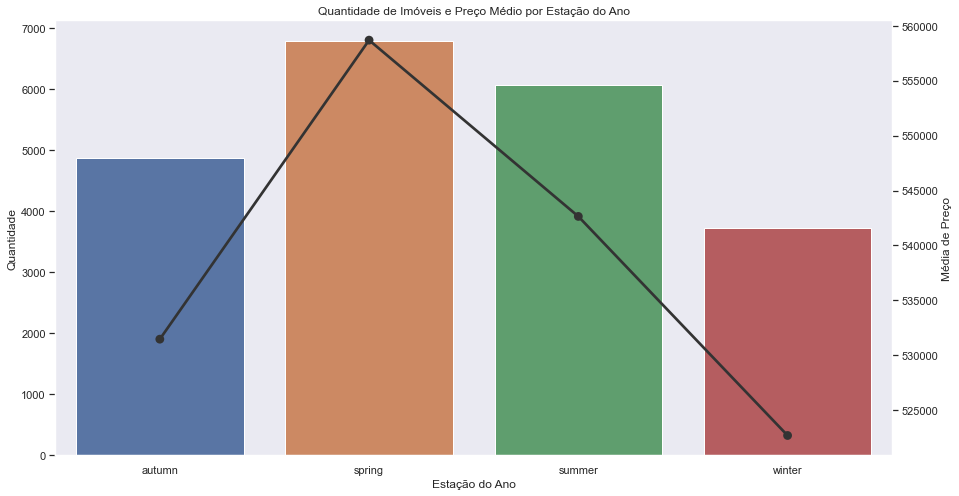

In [110]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
bar1 = sns.barplot(data = season_price, x = 'season', y = 'qty', ax = ax1)
bar1.set(title = 'Quantidade de Imóveis e Preço Médio por Estação do Ano', xlabel = 'Estação do Ano', ylabel = 'Quantidade')
bar1.grid(False)
line1 = sns.pointplot(data = season_price, x = 'season', y = 'mean', color='#333', ax = ax2)
line1.set(ylabel = 'Média de Preço')
line1.grid(False);

Existe uma certa correlação entre a quantidade de imóveis e o preço médio de acordo com a estação do ano: 
- No inverno tivemos menos imóveis anunciados, com um preço médio menor
- Na primavera tivemos mais imóveis anuncidos, com um preço médio maior

In [111]:
price_zip_season = df_m[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
price_zip_season.head(8)

,zipcode,season,price
0,98001,autumn,250000.00
1,98001,spring,262000.00
2,98001,summer,263000.00
3,98001,winter,269950.00
4,98002,autumn,236500.00
5,98002,spring,233301.50
6,98002,summer,231750.00
7,98002,winter,235000.00


In [112]:
aux = price_zip_season.pivot(index='zipcode', columns='season', values='price').reset_index()
aux = aux.rename(columns={'autumn':'med_autumn', 'spring':'med_spring', 'summer':'med_summer', 'winter':'med_winter'})
aux.head()

season,zipcode,med_autumn,med_spring,med_summer,med_winter
0,98001,250000.00,262000.00,263000.00,269950.00
1,98002,236500.00,233301.50,231750.00,235000.00
2,98003,261000.00,280000.00,261000.00,265000.00
3,98004,1116500.00,1180000.00,1014250.00,1374000.00
4,98005,806500.00,795000.00,740000.00,762450.00


In [113]:
df_m = pd.merge(df_m, aux, on='zipcode', how='left')

In [114]:
df_m[['price', 'zipcode', 'median_price', 'med_autumn', 'med_spring', 'med_summer', 'med_winter']].head()

,price,zipcode,median_price,med_autumn,med_spring,med_summer,med_winter
0,221900.00,98178,279500.00,284000.00,285000.00,277554.00,263295.00
1,538000.00,98125,425000.00,435500.00,429975.00,421750.00,425000.00
2,180000.00,98028,442500.00,442000.00,449950.00,425000.00,447500.00
3,604000.00,98136,489950.00,469300.00,515000.00,454900.00,525000.00
4,510000.00,98074,645000.00,630000.00,657500.00,637000.00,627800.00


In [115]:
df_m['best_season_to_buy'] = 'NA'

In [116]:
for i in range(len(df_m)):    
    
    cols = ['med_autumn', 'med_spring', 'med_summer', 'med_winter']
    
    if df_m.loc[i, 'recommendation'] == 'buy':
    
        min_price = df_m.loc[i, cols].min()
        
        if min_price == df_m.loc[i, 'med_autumn']:
            df_m.loc[i, 'best_season_to_buy'] = 'autumn'
        
        if min_price == df_m.loc[i, 'med_spring']:
            df_m.loc[i, 'best_season_to_buy'] = 'spring'
            
        if min_price == df_m.loc[i, 'med_summer']:
            df_m.loc[i, 'best_season_to_buy'] = 'summer'
            
        if min_price == df_m.loc[i, 'med_winter']:
            df_m.loc[i, 'best_season_to_buy'] = 'winter'

In [117]:
df_m[['price', 'median_price', 'med_autumn', 'med_spring', 'med_summer', 'med_winter', 'recommendation', 'best_season_to_buy']].head()

,price,median_price,med_autumn,med_spring,med_summer,med_winter,recommendation,best_season_to_buy
0,221900.00,279500.00,284000.00,285000.00,277554.00,263295.00,buy,winter
1,538000.00,425000.00,435500.00,429975.00,421750.00,425000.00,dont_buy,NA
2,180000.00,442500.00,442000.00,449950.00,425000.00,447500.00,buy,summer
3,604000.00,489950.00,469300.00,515000.00,454900.00,525000.00,dont_buy,NA
4,510000.00,645000.00,630000.00,657500.00,637000.00,627800.00,buy,winter


In [118]:
df_m['best_season_to_sell'] = 'NA'

In [119]:
for i in range(len(df_m)):    
    
    cols = ['med_autumn', 'med_spring', 'med_summer', 'med_winter']
    
    if df_m.loc[i, 'recommendation'] == 'buy':
    
        max_price = df_m.loc[i, cols].max()
        
        if max_price == df_m.loc[i, 'med_autumn']:
            df_m.loc[i, 'best_season_to_sell'] = 'autumn'
        
        if max_price == df_m.loc[i, 'med_spring']:
            df_m.loc[i, 'best_season_to_sell'] = 'spring'
            
        if max_price == df_m.loc[i, 'med_summer']:
            df_m.loc[i, 'best_season_to_sell'] = 'summer'
            
        if max_price == df_m.loc[i, 'med_winter']:
            df_m.loc[i, 'best_season_to_sell'] = 'winter'

In [120]:
df_m[['price', 'median_price', 'med_autumn', 'med_spring', 'med_summer', 'med_winter', 'recommendation', 'best_season_to_buy', 'best_season_to_sell']].head()

,price,median_price,med_autumn,med_spring,med_summer,med_winter,recommendation,best_season_to_buy,best_season_to_sell
0,221900.00,279500.00,284000.00,285000.00,277554.00,263295.00,buy,winter,spring
1,538000.00,425000.00,435500.00,429975.00,421750.00,425000.00,dont_buy,NA,NA
2,180000.00,442500.00,442000.00,449950.00,425000.00,447500.00,buy,summer,spring
3,604000.00,489950.00,469300.00,515000.00,454900.00,525000.00,dont_buy,NA,NA
4,510000.00,645000.00,630000.00,657500.00,637000.00,627800.00,buy,winter,spring


Levando em conta o preço mediano da região de acordo com a estação do ano, temos na tabela a melhor estação para comprar e a melhor estação para vender, visando maximizar o lucro da operação

### Hipóteses de Negócio

#### 1. Imóveis com vista para água são 50% mais caros

**Falso**: Imóveis com vista para a água são 212% mais caros.

**Insight**: Apesar de serem mais caros, imóveis com vista para água tem forte potencial de valorização.

In [121]:
waterfront = df.loc[df['waterfront'] == 'yes', 'price'].mean()

In [122]:
not_waterfront = df.loc[df['waterfront'] == 'no', 'price'].mean()

In [123]:
percentage = round(((waterfront - not_waterfront) / not_waterfront) * 100)

In [124]:
print(f'Imóveis com vista para a água são {percentage}% mais caros.')

Imóveis com vista para a água são 212% mais caros.


#### 2. Imóveis com porão são 15% mais caros

**Falso**: Imóveis com porão são 28% mais caros.

**Insight**: A depender da viabilidade e do custo, pode fazer sentido reformar e construir um porão em um imóvel, visando sua valorização.

In [125]:
basement_price = df.loc[df['sqft_basement'] != 0, 'price'].mean()

In [126]:
no_basement_price = df.loc[df['sqft_basement'] == 0, 'price'].mean()

In [127]:
percentage = round(((basement_price - no_basement_price) / no_basement_price) * 100)

In [128]:
print(f'Imóveis com porão são {percentage}% mais caros.')

Imóveis com porão são 28% mais caros.


#### 3. O número de andares dos imóveis cresceu ao longo dos anos

**Falso**: Ao longo dos anos, o número de andares dos imóveis caiu de 02 andares para somente 01, mas desde 1980 a média voltou a ser 02 andares.

**Insight**: Pode-se priorizar a compra de imóveis de 02 ou mais andares.

In [129]:
floors_y = df[['yr_built', 'floors']].groupby('yr_built')
floors_y = floors_y.agg(
                        mean_floors = pd.NamedAgg('floors', 'mean'),
                        qty = pd.NamedAgg('floors', 'count')
                        ).round().reset_index()
floors_y.head() 

,yr_built,mean_floors,qty
0,1900,2.00,86
1,1901,2.00,29
2,1902,2.00,27
3,1903,1.00,45
4,1904,1.00,44


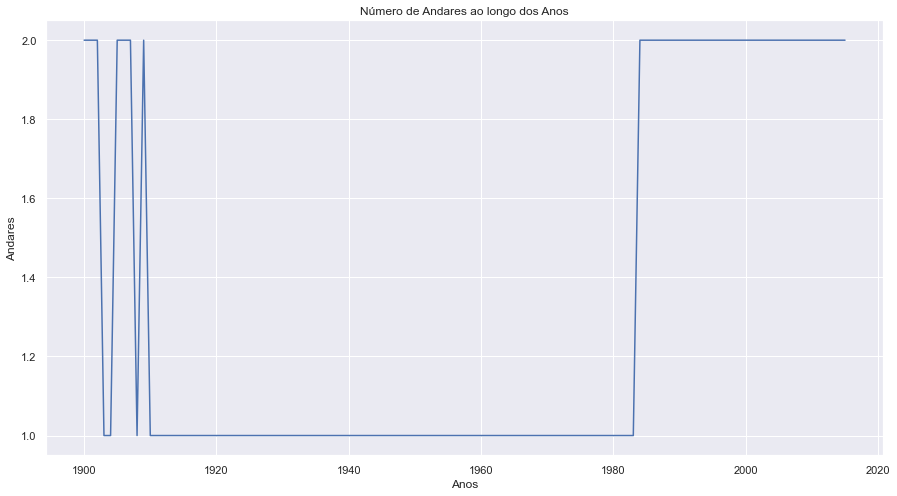

In [130]:
line2 = sns.lineplot(data = floors_y, x = 'yr_built', y = 'mean_floors')
line2.set(title = 'Número de Andares ao longo dos Anos', xlabel = 'Anos', ylabel = 'Andares');

#### 4. Imóveis com 02 andares são 20% mais caros que imóveis com 01 andar

**Falso**: Imóveis com 02 andares são 46% mais caros em comparação a imóveis com 01 andar.

**Insight**: Confirmando o insight anterior, os imóveis com 02 andares têm maior potencial de valorização.

In [131]:
two_price = df.loc[df['floors'] == 2, 'price'].mean()

In [132]:
one_price = df.loc[df['floors'] == 1, 'price'].mean()

In [133]:
percentage = round(((two_price - one_price) / one_price) * 100)

In [134]:
print(f'Imóveis com 02 andares são {percentage}% mais caros em comparação a imóveis com 01 andar.')

Imóveis com 02 andares são 46% mais caros em comparação a imóveis com 01 andar.


#### 5. Imóveis reformados são 40% mais caros que imóveis não reformados

**Verdadeiro**: Imóveis reformados são 43% mais caros em comparação a imóveis não reformados.

**Insight**: Dependendo do custo e da viabilidade, reformar um imóvel é uma boa maneira de aumentar o seu preço.

In [135]:
renov_price = df.loc[df['yr_renovated'] != 0, 'price'].mean()

In [136]:
no_renov_price = df.loc[df['yr_renovated'] == 0, 'price'].mean()

In [137]:
percentage = round(((renov_price - no_renov_price) / no_renov_price) * 100)

In [138]:
print(f'Imóveis reformados são {percentage}% mais caros em comparação a imóveis não reformados.')

Imóveis reformados são 43% mais caros em comparação a imóveis não reformados.


#### 6. Imóveis com 02 banheiros são 20% mais caros em comparação a imóveis com somente 01 banheiro

**Falso**: Imóveis com 02 banheiros são 32% mais caros em comparação a imóveis com somente 01 banheiro.

**Insight**: O público valoriza mais imóveis com 02 banheiros do que aqueles com 01 banheiro só.

In [139]:
two_bath_price = df.loc[df['bathrooms'] == 2, 'price'].mean()

In [140]:
one_bath_price = df.loc[df['bathrooms'] == 1, 'price'].mean()

In [141]:
percentage = round(((two_bath_price - one_bath_price) / one_bath_price) * 100)

In [142]:
print(f'Imóveis com 02 banheiros são {percentage}% mais caros em comparação a imóveis com somente 01 banheiro.')

Imóveis com 02 banheiros são 32% mais caros em comparação a imóveis com somente 01 banheiro.


#### 7. Imóveis com 03 quartos são 30% mais caros em comparação a imóveis com 02 ou menos quartos

**Falso**: Imóveis com 03 quartos são 18% mais caros em comparação a imóveis com 02 quartos.

**Insight**: A depender do custo e viabilidade, reformar o imóvel de 02 quartos e construir um novo quarto pode valorizar o imóvel.

In [143]:
three_rooms_price = df.loc[df['bedrooms'] == 3, 'price'].mean()

In [144]:
two_rooms_price = df.loc[df['bedrooms'] == 2, 'price'].mean()

In [145]:
percentage = round(((three_rooms_price - two_rooms_price) / two_rooms_price) * 100)

In [146]:
print(f'Imóveis com 03 quartos são {percentage}% mais caros em comparação a imóveis com 02 quartos.')

Imóveis com 03 quartos são 16% mais caros em comparação a imóveis com 02 quartos.


####  8. Imóveis com data de construção anterior a 1960 são 20% mais caros

**Falso**: Na média, imóveis construídos antes de 1960 são 4% mais caros em comparação a imóveis construídos depois de 1960.

**Insight**: Como não existe muita diferença de preço, pode-se priorizar a compra de imóveis construídos após 1960, por serem mais novos (dependendo também de outros fatores).

In [147]:
b_price = df.loc[df['yr_built'] < 1960, 'price'].mean()

In [148]:
a_price = df.loc[df['yr_built'] >= 1960, 'price'].mean()

In [149]:
percentage = round(((a_price - b_price) / b_price) * 100)

In [150]:
print(f'Imóveis construídos antes de 1960 são {percentage}% mais caros em comparação a imóveis construídos depois de 1960.')

Imóveis construídos antes de 1960 são 4% mais caros em comparação a imóveis construídos depois de 1960.


#### 9. Entre os imóveis construídos antes de 1960, os reformados têm um preço 40% maior

**Falso**: Imóveis construídos antes dessa data e reformados são 48% mais caros em comparação aos não reformados construídos no mesmo período.

**Insight**: Conforme visto acima, não existe muita diferença de preço entre imóveis construídos antes e depois de 1960, então uma sugestão poderia ser comprar os imóveis construídos antes de 1960 e reformá-los, visando uma valorização expressiva. 

In [151]:
b_renov = df[(df['yr_built'] < 1960) & (df['yr_renovated'] != 0)][['yr_built', 'price', 'yr_renovated']]
b_re_price = b_renov['price'].mean()

In [152]:
b_no_renov = df[(df['yr_built'] < 1960) & (df['yr_renovated'] == 0)][['yr_built', 'price', 'yr_renovated']]
b_no_price = b_no_renov['price'].mean()

In [153]:
percentage = round(((b_re_price - b_no_price) / b_no_price) * 100)

In [154]:
print(f'Imóveis construídos antes de 1960 e reformados são {percentage}% mais caros em comparação a imóveis construídos no mesmo período e não reformados.')

Imóveis construídos antes de 1960 e reformados são 48% mais caros em comparação a imóveis construídos no mesmo período e não reformados.


#### 10. Imóveis com uma boa vista (nota 2 ou maior) são 30% mais caros

**Falso**: Imóveis com boa vista são 91% mais caros em comparação a imóveis com uma vista ruim.

**Insight**: A vista de um imóvel é um atributo a ser considerado na hora de aquisição dos imóveis, haja vista a diferença expressiva de preço entre os que tem uma boa vista e os que não tem.

In [155]:
good_price = df.loc[df['view'] >= 2, 'price'].mean()

In [156]:
bad_price = df.loc[df['view'] < 2, 'price'].mean()

In [157]:
percentage = round(((good_price - bad_price) / bad_price) * 100)

In [158]:
print(f'Imóveis com uma boa vista são {percentage}% mais caros em comparação a imóveis com uma vista ruim.')

Imóveis com uma boa vista são 91% mais caros em comparação a imóveis com uma vista ruim.


### Exportando o Dataset Alterado

In [159]:
df_m.to_csv('csv/kc_house_data_final.csv')